<a href="https://colab.research.google.com/github/pakkardkaw/deepLearningHomework/blob/main/credit_card_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Data
**About Dataset** A business manager of a consumer credit card bank is facing the problem of customer attrition. They want to analyze the data to find out the reason behind this and leverage the same to predict customers who are likely to drop off.

**Content** 

CLIENTNUM : Client number. Unique identifier for the customer holding the account

Attrition_Flag : Internal event (customer activity) variable - if the account is closed then 1 else 0

Customer_Age : Demographic variable - Customer's Age in Years

Gender : Demographic variable - M=Male, F=Female

Dependent_count : Demographic variable - Number of dependents

Education_Level : Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.)

Marital_Status: Demographic variable - Married, Single, Divorced, Unknown

Income_Category : Demographic variable - Annual Income Category of the account holder (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, > $120K, Unknown)

Card_Category : Product Variable - Type of Card (Blue, Silver, Gold, Platinum)

Months_on_book : Period of relationship with bank

Total_Relationship_Count : Total no. of products held by the customer

Months_Inactive_12_mon : No. of months inactive in the last 12 months

Contacts_Count_12_mon : No. of Contacts in the last 12 months

Credit_Limit : Credit Limit on the Credit Card

Total_Revolving_Bal : Total Revolving Balance on the Credit Card

Avg_Open_To_Buy : Open to Buy Credit Line (Average of last 12 months)

Total_Amt_Chng_Q4_Q1 : Change in Transaction Amount (Q4 over Q1)

Total_Trans_Amt : Total Transaction Amount (Last 12 months)

Total_Trans_Ct : Total Transaction Count (Last 12 months)

Total_Ct_Chng_Q4_Q1 : Change in Transaction Count (Q4 over Q1)

Avg_Utilization_Ratio : Average Card Utilization Ratio



**Link** 
https://www.kaggle.com/datasets/anwarsan/credit-card-bank-churn



# 1) Importing Packages & Import Data

In [1]:
## Import Library
# data analysis
import numpy as np
import pandas as pd
import time
# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


# machine learning only sklearn for this rule
import sklearn.linear_model as lm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, auc, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.svm import SVC
#from imblearn.over_sampling import RandomOverSampler, SMOTE
#from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import RidgeClassifier, SGDClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, XGBRFClassifier
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load Data
df_alldata = pd.read_csv('https://raw.githubusercontent.com/pakkardkaw/deepLearningHomework/main/credit_card_churn.csv')

#Drop last 2 columns as reccomendation from data provider & drop client number
df_alldata=df_alldata.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',axis=1)
df_alldata=df_alldata.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',axis=1)
df_alldata=df_alldata.drop('CLIENTNUM',axis=1)

df_alldata=df_alldata.dropna(axis=0)









# 2) Exploration Data Analysis (EDA)

In [3]:
df_alldata.dtypes

Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [4]:
for x_col in df_alldata.columns:
    fig = px.histogram(df_alldata, x=x_col, color="Attrition_Flag",title="x_col")
    fig.show()




# 3) Preprocessing

## 3.1) Encoding data

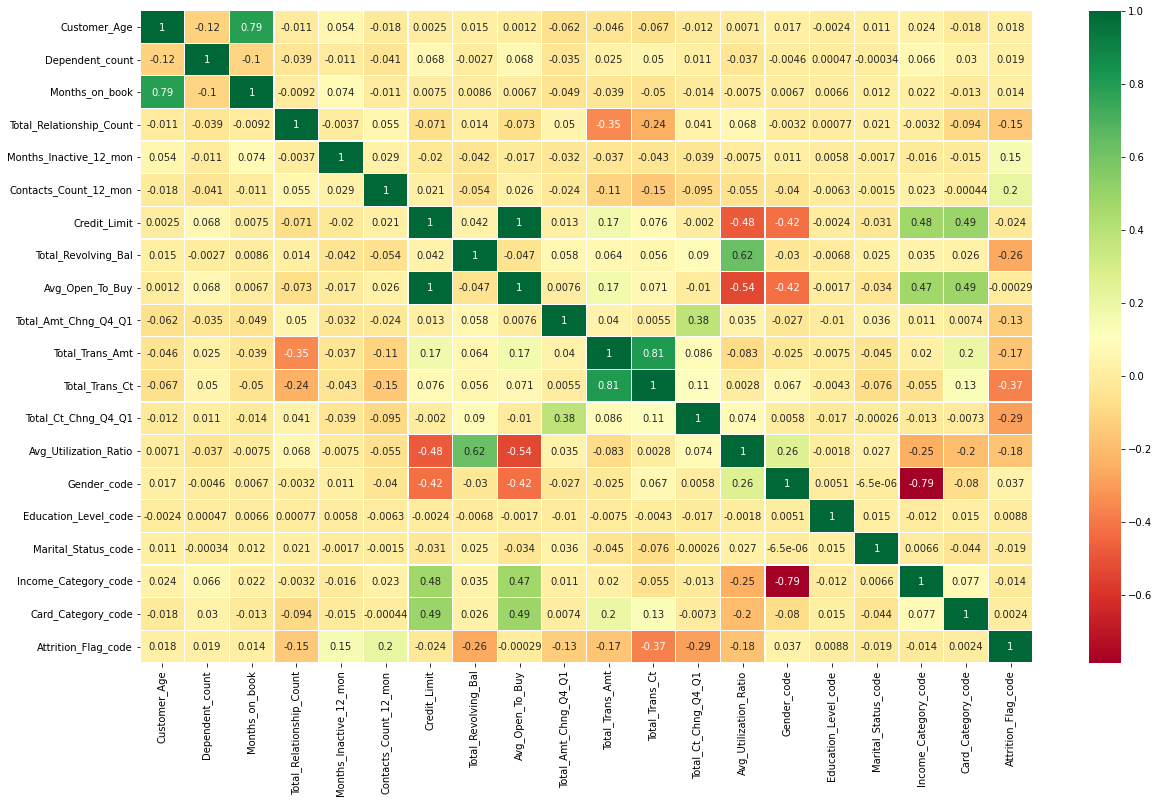

In [5]:
#Encode Catagorical data

df_alldata['Gender_code']=df_alldata['Gender'].map({
                                                    'M':0,
                                                    'F':1
                                                    })
df_alldata['Education_Level_code']=df_alldata['Education_Level'].map({
                                                                'Unknown':0,
                                                                'Uneducated':1,
                                                                'High School':2,
                                                                'College':3,
                                                                'Graduate':4,
                                                                'Post-Graduate':5,
                                                                'Doctorate':6
                                                                })

df_alldata['Marital_Status_code']=df_alldata['Marital_Status'].map({
                                                                'Unknown':0,
                                                                'Single':1,
                                                                'Married':2,
                                                                'Divorced':3
                                                                })

df_alldata['Income_Category_code']=df_alldata['Income_Category'].map({
                                                                'Unknown':0,
                                                                'Less than $40K':1,
                                                                '$40K - $60K':2,
                                                                '$60K - $80K':3,
                                                                '$80K - $120K':4,
                                                                '$120K +':5
                                                                })


df_alldata['Card_Category_code']=df_alldata['Card_Category'].map({
                                                                'Blue':0,
                                                                'Silver':1,
                                                                'Gold':2,
                                                                'Platinum':3
                                                                })

df_alldata['Attrition_Flag_code']=df_alldata['Attrition_Flag'].map({
                                                                'Existing Customer':0,
                                                                'Attrited Customer':1
                                                                })

# Remove Catagorical columns
df_alldata=df_alldata.select_dtypes([np.number])

sns.heatmap(df_alldata.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

## 3.2) Handling Imbalance data

### Over- sampling

The simplest implementation of over-sampling is to duplicate random records from the minority class, which can cause overfishing.

In under-sampling, the simplest technique involves removing random records from the majority class, which can cause loss of information.

In [6]:
pos = df_alldata[df_alldata['Attrition_Flag_code']==1]
neg = df_alldata[df_alldata['Attrition_Flag_code']==0]
print(pos.shape)
print(neg.shape)

# Over-sampling
pos_rand = pos.sample(neg.shape[0],replace = True)  # duplicates randomly *exit.shape[0] - stay.shape[0]* samples
pos_rand.shape

df_alldata = pd.concat([pos_rand,neg],axis =0)

df_alldata['Attrition_Flag_code'].value_counts()

(1627, 20)
(8500, 20)


1    8500
0    8500
Name: Attrition_Flag_code, dtype: int64

## 3.3) Spliting data 
### Splitting of the Data into separate training 70%, test 20% and validate set 10%

In [7]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
#Split Train Test Data  train test valiation 70% 20% 10%
from sklearn.model_selection import train_test_split
x_all=df_alldata
y_all=df_alldata[['Attrition_Flag_code']]


x_train, x_test, y_train, y_test = train_test_split(df_alldata, df_alldata[['Attrition_Flag_code']],train_size=0.8,stratify=df_alldata[['Attrition_Flag_code']],random_state=1)

x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train[['Attrition_Flag_code']],train_size=0.875,stratify=y_train[['Attrition_Flag_code']],random_state=1)


#Explore Train & Test

for x_col in x_train.columns:
    

    fig = px.histogram(x_train, x=x_col, color="Attrition_Flag_code",title="Train")
    fig.show()
    fig = px.histogram(x_test, x=x_col, color="Attrition_Flag_code",title="Test")
    fig.show()
    fig = px.histogram(x_valid, x=x_col, color="Attrition_Flag_code",title="Validate")
    fig.show()


x_train=x_train.drop('Attrition_Flag_code',axis=1)
x_test=x_test.drop('Attrition_Flag_code',axis=1)
x_valid=x_valid.drop('Attrition_Flag_code',axis=1)

## 3.4) Normalize data

In [8]:
#Normalize data
scaler = StandardScaler()  
scaler.fit(x_train) 
x_train = scaler.transform(x_train) 

In [9]:
x_test = scaler.transform(x_test)
x_valid = scaler.transform(x_valid)

# 4) Machine learning
#### Model selection on scikit-learn

In [10]:
#set Seed for each repetitive
seednumber=[911,444,888]

In [11]:
#ML Model


from sklearn.metrics import roc_auc_score, roc_curve
%matplotlib inline


best_model = None
best_model_name = ""
best_valid = 0
resultlist= pd.DataFrame([], columns=['model', 'runtime','Acc','repetition','type'])
for i in range(3):
  print("******************************************************************")
  print("********   Repetitive" +str(i) + "  Set Seed = " + str(seednumber[i]))
  models = []
  models.append(('LDA', LinearDiscriminantAnalysis()))
  models.append(('QDA', QuadraticDiscriminantAnalysis()))
  models.append(('AdaBoost', AdaBoostClassifier(random_state=seednumber[i])))
  models.append(('Bagging', BaggingClassifier(random_state=seednumber[i])))
  models.append(('Extra Trees Ensemble', ExtraTreesClassifier(random_state=seednumber[i])))
  models.append(('Gradient Boosting', GradientBoostingClassifier(random_state=seednumber[i])))
  models.append(('Random Forest', RandomForestClassifier(random_state=seednumber[i])))
  models.append(('Ridge', RidgeClassifier(random_state=seednumber[i])))
  models.append(('SGD', SGDClassifier(random_state=seednumber[i])))
  models.append(('BNB', BernoulliNB()))
  models.append(('GNB', GaussianNB()))
  models.append(('KNN', KNeighborsClassifier()))
  models.append(('MLP', MLPClassifier(random_state=seednumber[i])))
  models.append(('LSVC', LinearSVC(random_state=seednumber[i])))
  models.append(('DTC', DecisionTreeClassifier(random_state=seednumber[i])))
  models.append(('ETC', ExtraTreeClassifier(random_state=seednumber[i])))
  models.append(('XGB', XGBClassifier(objective='binary:logistic',eval_metric=['logloss'],random_state=seednumber[i])))
  models.append(('XGBRF', XGBRFClassifier(objective='binary:logistic',eval_metric=['logloss'],random_state=seednumber[i])))
  DECISION_FUNCTIONS = {"Ridge", "SGD", "LSVC", "SVC"}

  for name, model in models:
      start_time = time.time()
      model.fit(x_train, y_train)
      end_time = time.time()
      
      if name in DECISION_FUNCTIONS:
          proba = model.decision_function(x_test)
      else:
          proba = model.predict_proba(x_test)[:, 1]
      y_pred=model.predict(x_test)
      s=accuracy_score(y_test,y_pred) #f1_score(y_test, model.predict(x_test), average='weighted') 

      trainscore=accuracy_score(y_train,model.predict(x_train))
      
      #score =  roc_auc_score(y_train, proba)

      
      result = {'model': name, 'runtime': end_time - start_time, 'Acc': trainscore,'repetition' : i,'type' :'ML'}
      resultlist=resultlist.append(result, ignore_index = True)
      """
      fpr, tpr, _  = roc_curve(y_test, proba)
      plt.figure()
      plt.plot(fpr, tpr, color='darkorange', label=f"ROC curve (auc = {score})")
      plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
      plt.title(f"{name} Results")
      plt.xlabel("False Positive Rate")
      plt.ylabel("True Positive Rate")
      plt.legend(loc="lower right")
      plt.show()
      """
      print(  name+ " Accuracy =" + str(trainscore))
      print(  name+ "--- %s seconds ---" % (end_time - start_time))
      
      if trainscore > best_valid:
          best_valid = trainscore
          best_model = model
          best_model_name = name

  print(f"Best model is {best_model_name}")

******************************************************************
********   Repetitive0  Set Seed = 911
LDA Accuracy =0.8469747899159664
LDA--- 0.04946732521057129 seconds ---
QDA Accuracy =0.8411764705882353
QDA--- 0.011122703552246094 seconds ---
AdaBoost Accuracy =0.9450420168067227
AdaBoost--- 0.710808515548706 seconds ---
Bagging Accuracy =0.9994957983193278
Bagging--- 0.5833253860473633 seconds ---
Extra Trees Ensemble Accuracy =1.0
Extra Trees Ensemble--- 0.8051071166992188 seconds ---
Gradient Boosting Accuracy =0.9684873949579832
Gradient Boosting--- 4.717737674713135 seconds ---
Random Forest Accuracy =1.0
Random Forest--- 2.6556508541107178 seconds ---
Ridge Accuracy =0.8469747899159664
Ridge--- 0.0211026668548584 seconds ---
SGD Accuracy =0.8408403361344537
SGD--- 0.2082366943359375 seconds ---
BNB Accuracy =0.802016806722689
BNB--- 0.01761913299560547 seconds ---
GNB Accuracy =0.7988235294117647
GNB--- 0.012081384658813477 seconds ---
KNN Accuracy =0.9428571428571428
KNN

# Compare Machine Learning Result

In [12]:
# Compare Machine Learning

accResult=resultlist[["model","Acc"]].groupby("model").mean().reset_index()
print(resultlist[["model","Acc"]].groupby("model").agg(['mean','std','count']))
print("********************")
print("The best model is " + accResult[accResult['Acc']==max(accResult['Acc'])]['model'])
#fig = px.scatter(resultlist, x="runtime", y="Acc", color="model",size="Acc", hover_data=['model' , 'repetition'],title='Accuracy vs Runtime for ML models')
#fig.show()


#fig = px.box(resultlist, x="model", y="Acc", points="all",title="Accuracy score for ML model")
#fig.show()

#fig = px.box(resultlist, x="model", y="runtime", points="all",title="Runtime for ML model")
#fig.show()

#print(np.argmax(y_pred))




                           Acc                
                          mean       std count
model                                         
AdaBoost              0.945042  0.000000     3
BNB                   0.802017  0.000000     3
Bagging               0.999216  0.000257     3
DTC                   1.000000  0.000000     3
ETC                   1.000000  0.000000     3
Extra Trees Ensemble  1.000000  0.000000     3
GNB                   0.798824  0.000000     3
Gradient Boosting     0.968487  0.000000     3
KNN                   0.942857  0.000000     3
LDA                   0.846975  0.000000     3
LSVC                  0.845546  0.000000     3
MLP                   0.987619  0.001097     3
QDA                   0.841176  0.000000     3
Random Forest         1.000000  0.000000     3
Ridge                 0.846975  0.000000     3
SGD                   0.842045  0.001314     3
XGB                   0.969580  0.000000     3
XGBRF                 0.896443  0.002282     3
*************

## 4.2) Tuning model 

### Adjust n_estimator

In [13]:
h_n_estimator=range(50,300,50)

best_score=0
best_n_estimator=0

MLTuneResultlist= pd.DataFrame([], columns=['parameter','parameter_value', 'runtime','Acc','repetition'])
for i in range(3):
  print("**************** Repetitive "+str(i)+" **")
  for n_e in h_n_estimator:
    start_time = time.time()
    clf = ExtraTreesClassifier(n_estimators=n_e,random_state=seednumber[i]).fit(x_train, y_train)
    end_time = time.time()
    s=accuracy_score(y_valid,clf.predict(x_valid)) #clf.score(x_test, y_test)
    MLTuneResult = {'parameter': 'n_estimators','parameter_value': n_e, 'runtime': end_time - start_time, 'Acc': s,'repetition' : i}
    MLTuneResultlist=MLTuneResultlist.append(MLTuneResult, ignore_index = True)
    
    print('n_estimator = '+str(n_e)+ "   Acc="+str(s))
    if s>best_score:
      best_score=s
      best_n_estimator=n_e



**************** Repetitive 0 **
n_estimator = 50   Acc=0.9882352941176471
n_estimator = 100   Acc=0.9876470588235294
n_estimator = 150   Acc=0.9864705882352941
n_estimator = 200   Acc=0.9852941176470589
n_estimator = 250   Acc=0.9876470588235294
**************** Repetitive 1 **
n_estimator = 50   Acc=0.99
n_estimator = 100   Acc=0.9870588235294118
n_estimator = 150   Acc=0.9888235294117647
n_estimator = 200   Acc=0.9888235294117647
n_estimator = 250   Acc=0.9882352941176471
**************** Repetitive 2 **
n_estimator = 50   Acc=0.9882352941176471
n_estimator = 100   Acc=0.9882352941176471
n_estimator = 150   Acc=0.9876470588235294
n_estimator = 200   Acc=0.9876470588235294
n_estimator = 250   Acc=0.9876470588235294


In [14]:


print(MLTuneResultlist[['parameter','parameter_value','Acc','runtime']].groupby(['parameter','parameter_value']).agg(['mean','std']).reset_index())





      parameter parameter_value       Acc             runtime          
                                     mean       std      mean       std
0  n_estimators              50  0.988824  0.001019  0.405162  0.004741
1  n_estimators             100  0.987647  0.000588  0.798700  0.009306
2  n_estimators             150  0.987647  0.001176  1.199650  0.028475
3  n_estimators             200  0.987255  0.001797  1.616747  0.042382
4  n_estimators             250  0.987843  0.000340  1.984073  0.005743


## 4.3) Compare Model - After tuning

In [15]:
FinalResultList= pd.DataFrame([], columns=['model', 'train time', 'inference time','Acc','repetition','type'])
MLCompareDataSetResultlist= pd.DataFrame([], columns=['data set','train time', 'inference time','Acc','records','repetition'])

for i in range(3):
  train_start_time = time.time()
  clf = ExtraTreesClassifier(n_estimators=best_n_estimator,random_state=seednumber[i]).fit(x_train, y_train)
  train_end_time = time.time()
  inference_start_time = time.time()
  s=clf.score(x_train, y_train)
  inference_end_time = time.time()
  result = {'data set': 'train', 'train time': train_end_time - train_start_time,'inference time': inference_end_time-inference_start_time, 'Acc': s,'records' : x_train.shape[0],'repetition' : i }
  MLCompareDataSetResultlist=MLCompareDataSetResultlist.append(result, ignore_index = True)
  inference_start_time = time.time()
  s=clf.score(x_valid, y_valid)
  inference_end_time = time.time()
  result = {'data set': 'validate', 'train time': train_end_time - train_start_time,'inference time': inference_end_time-inference_start_time, 'Acc': s,'records' : x_valid.shape[0],'repetition' : i }
  MLCompareDataSetResultlist=MLCompareDataSetResultlist.append(result, ignore_index = True)
  inference_start_time = time.time()
  s=clf.score(x_test, y_test)
  inference_end_time = time.time()
  result = {'data set': 'test', 'train time': train_end_time - train_start_time,'inference time': inference_end_time-inference_start_time, 'Acc': s,'records' : x_test.shape[0],'repetition' : i }
  MLCompareDataSetResultlist=MLCompareDataSetResultlist.append(result, ignore_index = True)

  
  result = {'model': 'ExtraTreesClassifier', 'train time': train_end_time - train_start_time,'inference time': inference_end_time-inference_start_time, 'Acc': s,'repetition' : i,'type' :'ML'}
  FinalResultList=FinalResultList.append(result, ignore_index = True)

  print(confusion_matrix(y_test,clf.predict(x_test)))

[[1672   28]
 [  18 1682]]
[[1677   23]
 [  14 1686]]
[[1672   28]
 [  11 1689]]


In [16]:
######################################################
## To fill result in Train vs Validation vs Test table
########################################################
print(MLCompareDataSetResultlist[['data set','train time', 'inference time','Acc','records']].groupby('data set').agg(['mean','std']).reset_index())

   data set train time           inference time                 Acc            \
                  mean       std           mean       std      mean       std   
0      test   0.402188  0.008039       0.038374  0.000729  0.988039  0.001390   
1     train   0.402188  0.008039       0.104944  0.003908  1.000000  0.000000   
2  validate   0.402188  0.008039       0.022850  0.000957  0.988824  0.001019   

   records       
      mean  std  
0   3400.0  0.0  
1  11900.0  0.0  
2   1700.0  0.0  


# 5) Deep learning

In [17]:
!nvidia-smi -L
import tensorflow as tf
print( f"TensorFlow {tf.__version__}" )
print( f"tf.keras.backend.image_data_format() = {tf.keras.backend.image_data_format()}" )

# Count the number of GPUs as detected by tensorflow
gpus = tf.config.list_physical_devices('GPU')
print( f"TensorFlow detected { len(gpus) } GPU(s):" )
for i, gpu in enumerate(gpus):
  print( f".... GPU No. {i}: Name = {gpu.name} , Type = {gpu.device_type}" )



GPU 0: Tesla T4 (UUID: GPU-25751df0-c531-1cfc-a334-420020ecd3bf)
TensorFlow 2.8.2
tf.keras.backend.image_data_format() = channels_last
TensorFlow detected 1 GPU(s):
.... GPU No. 0: Name = /physical_device:GPU:0 , Type = GPU


##5.1) Change data type
Data format: data type

Most DL frameworks use float32 as a default data type

In [18]:
x_traindp = x_train.astype(np.float32)
x_testdp = x_test.astype(np.float32)
x_validdp = x_valid.astype(np.float32)

y_traindp = y_train.to_numpy()
y_testdp = y_test.to_numpy()
y_validdp = y_valid.to_numpy()

##5.2) Create the network architecture

In [19]:
model = tf.keras.models.Sequential()

input_dim = x_train.shape[1]    
output_dim = 2

# Input layer
model.add( tf.keras.Input(shape=(input_dim,)) )

# Hidden layer
model.add( tf.keras.layers.Dense(32, activation='relu', name='hidden1') )   # use default weight initialization, don't use any regularization
model.add( tf.keras.layers.BatchNormalization(axis=-1, name='bn1') )  
model.add( tf.keras.layers.Dense(64, activation='relu', name='hidden2') )   # use default weight initialization, don't use any regularization
model.add( tf.keras.layers.BatchNormalization(axis=-1, name='bn2') )
model.add( tf.keras.layers.Dense(32, activation='relu', name='hidden3') )   # use default weight initialization, don't use any regularization
model.add( tf.keras.layers.Dropout(0.3) )                        # drop rate = 30%

# Output layer
model.add( tf.keras.layers.Dense(output_dim, activation='softmax', name='output') )

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             (None, 32)                640       
                                                                 
 bn1 (BatchNormalization)    (None, 32)                128       
                                                                 
 hidden2 (Dense)             (None, 64)                2112      
                                                                 
 bn2 (BatchNormalization)    (None, 64)                256       
                                                                 
 hidden3 (Dense)             (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 output (Dense)              (None, 2)                 6

##5.3) Compile the model

In [20]:
#create function to calculate f1
from keras import backend as K

# Compile with default values for both optimizer and loss
model.compile( optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'] )
# Compile + hyperparameter tuning
model.compile( optimizer=tf.keras.optimizers.Adam(learning_rate=0.001) , 
                       loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False) ,
                       metrics=['acc'] 
                     )

## 5.4) Tune batch size (32,64,128)

In [21]:
h_batch_size=[32,64,128]

DLTuneResultlist= pd.DataFrame([], columns=['parameter','parameter_value', 'runtime','Acc','repetition'])
best_batch_number=h_batch_size[0]
best_s=0
for i in range(1):
  
  np.random.seed(seednumber[i])
  tf.random.set_seed(seednumber[i])

  for h_n in h_batch_size:
    checkpoint_filepath = "bestmodel_epoch{epoch:02d}_valloss{val_loss:.2f}.hdf5"
    model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint( filepath=checkpoint_filepath,
                                                                                                  save_weights_only=True,
                                                                                                  monitor='val_acc',
                                                                                                  mode='max',
                                                                                                  save_best_only=True)

    start_time = time.time()
    history = model.fit ( x_traindp, y_traindp, batch_size=h_n, epochs=100, verbose=1, validation_split=0.3, callbacks=[model_checkpoint_callback] )
    end_time = time.time()

    y_pred = model.predict( x_validdp)
    s=accuracy_score(y_validdp,np.argmax(y_pred,axis = 1)) #f1_score(y_test, np.argmax(y_pred,axis = 1), average='weighted') 
    print(s)

    if s>best_s:
      best_s=s
      best_batch_number=h_n

    DLTuneResult = {'parameter': 'h_batch_size','parameter_value': h_n, 'runtime': end_time - start_time, 'Acc': s,'repetition' : i}
    DLTuneResultlist=DLTuneResultlist.append(DLTuneResult, ignore_index = True)

print(DLTuneResultlist[['parameter','parameter_value','Acc','runtime']].groupby(['parameter','parameter_value']).agg(['mean','std','count']).reset_index())
print('Best batch size = ' + str(best_batch_number))


Epoch 1/100
261/261 [==============================] - 5s 5ms/step - loss: 0.4897 - acc: 0.7683 - val_loss: 0.3354 - val_acc: 0.8529
Epoch 2/100
261/261 [==============================] - 1s 4ms/step - loss: 0.3437 - acc: 0.8509 - val_loss: 0.2726 - val_acc: 0.8762
Epoch 3/100
261/261 [==============================] - 1s 4ms/step - loss: 0.3000 - acc: 0.8687 - val_loss: 0.2445 - val_acc: 0.8930
Epoch 4/100
261/261 [==============================] - 1s 4ms/step - loss: 0.2795 - acc: 0.8796 - val_loss: 0.2302 - val_acc: 0.9008
Epoch 5/100
261/261 [==============================] - 1s 4ms/step - loss: 0.2540 - acc: 0.8908 - val_loss: 0.2175 - val_acc: 0.9076
Epoch 6/100
261/261 [==============================] - 1s 5ms/step - loss: 0.2397 - acc: 0.8987 - val_loss: 0.2084 - val_acc: 0.9162
Epoch 7/100
261/261 [==============================] - 1s 4ms/step - loss: 0.2333 - acc: 0.9011 - val_loss: 0.2042 - val_acc: 0.9151
Epoch 8/100
261/261 [==============================] - 1s 5ms/step - 

## 5.5) Tune Epoch (50,100,300)


In [22]:
h_Epoch=[50,100,300]
best_Epoch=h_Epoch[0]
best_s=0


for i in range(1):
  
  np.random.seed(seednumber[i])
  tf.random.set_seed(seednumber[i])

  for h_n in h_Epoch:
    checkpoint_filepath = "bestmodel_epoch{epoch:02d}_valloss{val_loss:.2f}.hdf5"
    model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint( filepath=checkpoint_filepath,
                                                                                                  save_weights_only=True,
                                                                                                  monitor='val_acc',
                                                                                                  mode='max',
                                                                                                  save_best_only=True)

    start_time = time.time()
    history = model.fit ( x_traindp, y_traindp, batch_size=best_batch_number, epochs=h_n, verbose=1, validation_split=0.3, callbacks=[model_checkpoint_callback] )
    end_time = time.time()

    y_pred = model.predict( x_validdp)
    s=accuracy_score(y_validdp,np.argmax(y_pred,axis = 1)) #f1_score(y_test, np.argmax(y_pred,axis = 1), average='weighted') 
    print(s)
    if s>best_s:
      best_s=s
      best_Epoch=h_n


    DLTuneResult = {'parameter': 'h_epoch','parameter_value': h_n, 'runtime': end_time - start_time, 'Acc': s,'repetition' : i}
    DLTuneResultlist=DLTuneResultlist.append(DLTuneResult, ignore_index = True)

print(DLTuneResultlist[['parameter','parameter_value','Acc','runtime']].groupby(['parameter','parameter_value']).agg(['mean','std','count']).reset_index())

print('Best Epoch = ' + str(best_Epoch))

Epoch 1/50
66/66 [==============================] - 1s 6ms/step - loss: 0.0161 - acc: 0.9941 - val_loss: 0.1768 - val_acc: 0.9734
Epoch 2/50
66/66 [==============================] - 0s 5ms/step - loss: 0.0134 - acc: 0.9957 - val_loss: 0.1834 - val_acc: 0.9711
Epoch 3/50
66/66 [==============================] - 0s 5ms/step - loss: 0.0096 - acc: 0.9965 - val_loss: 0.1843 - val_acc: 0.9717
Epoch 4/50
66/66 [==============================] - 0s 5ms/step - loss: 0.0144 - acc: 0.9957 - val_loss: 0.1695 - val_acc: 0.9742
Epoch 5/50
66/66 [==============================] - 0s 5ms/step - loss: 0.0115 - acc: 0.9959 - val_loss: 0.1718 - val_acc: 0.9754
Epoch 6/50
66/66 [==============================] - 0s 5ms/step - loss: 0.0148 - acc: 0.9953 - val_loss: 0.1868 - val_acc: 0.9697
Epoch 7/50
66/66 [==============================] - 0s 5ms/step - loss: 0.0108 - acc: 0.9966 - val_loss: 0.1783 - val_acc: 0.9723
Epoch 8/50
66/66 [==============================] - 0s 5ms/step - loss: 0.0103 - acc: 0.99

## 5.6) Tune optimizer Adam,Adamax,Nadam

In [23]:
model = tf.keras.models.Sequential()

input_dim = x_train.shape[1]    
output_dim = 2

# Input layer
model.add( tf.keras.Input(shape=(input_dim,)) )

# Hidden layer
model.add( tf.keras.layers.Dense(32, activation='relu', name='hidden1') )   # use default weight initialization, don't use any regularization
model.add( tf.keras.layers.BatchNormalization(axis=-1, name='bn1') )  
model.add( tf.keras.layers.Dense(64, activation='relu', name='hidden2') )   # use default weight initialization, don't use any regularization
model.add( tf.keras.layers.BatchNormalization(axis=-1, name='bn2') )
model.add( tf.keras.layers.Dense(32, activation='relu', name='hidden3') )   # use default weight initialization, don't use any regularization
model.add( tf.keras.layers.Dropout(0.3) )                        # drop rate = 30%

# Output layer
model.add( tf.keras.layers.Dense(output_dim, activation='softmax', name='output') )

model.summary()

#create function to calculate f1
from keras import backend as K
h_optimizer=['Adam','Adamax','Nadam']
best_s=0
best_optimizer=h_optimizer[0]
for h_n in h_optimizer:
  # Compile with default values for both optimizer and loss
  model.compile( optimizer=h_n, loss='sparse_categorical_crossentropy', metrics=['acc'] )
  # Compile + hyperparameter tuning
  model.compile( optimizer=tf.keras.optimizers.Adam(learning_rate=0.001) , 
                        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False) ,
                        metrics=['acc'] 
                      )


  for i in range(1):
    checkpoint_filepath = "bestmodel_epoch{epoch:02d}_valloss{val_loss:.2f}.hdf5"
    model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint( filepath=checkpoint_filepath,
                                                                                                  save_weights_only=True,
                                                                                                  monitor='val_acc',
                                                                                                  mode='max',
                                                                                                  save_best_only=True)

    start_time = time.time()
    history = model.fit ( x_traindp, y_traindp, batch_size=best_batch_number, epochs=best_Epoch, verbose=1, validation_split=0.3, callbacks=[model_checkpoint_callback] )
    end_time = time.time()

    y_pred = model.predict( x_validdp)
    s=accuracy_score(y_validdp,np.argmax(y_pred,axis = 1)) #f1_score(y_test, np.argmax(y_pred,axis = 1), average='weighted') 
    print(s)

    if s>best_s:
      best_s=s
      best_optimizer=h_n


    DLTuneResult = {'parameter': 'optimizer','parameter_value': h_n, 'runtime': end_time - start_time, 'Acc': s,'repetition' : i}
    DLTuneResultlist=DLTuneResultlist.append(DLTuneResult, ignore_index = True)

print(DLTuneResultlist[['parameter','parameter_value','Acc','runtime']].groupby(['parameter','parameter_value']).agg(['mean','std','count']).reset_index())

print('Best Optimizer = ' + str(best_optimizer))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             (None, 32)                640       
                                                                 
 bn1 (BatchNormalization)    (None, 32)                128       
                                                                 
 hidden2 (Dense)             (None, 64)                2112      
                                                                 
 bn2 (BatchNormalization)    (None, 64)                256       
                                                                 
 hidden3 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 output (Dense)              (None, 2)                

## 5.6) Inference on train, validate and test dataset

In [24]:
DLCompareDataSetResultlist= pd.DataFrame([], columns=['data set','train time', 'inference time','Acc','records','repetition'])

model = tf.keras.models.Sequential()

input_dim = x_train.shape[1]    
output_dim = 2

# Input layer
model.add( tf.keras.Input(shape=(input_dim,)) )

# Hidden layer
model.add( tf.keras.layers.Dense(32, activation='relu', name='hidden1') )   # use default weight initialization, don't use any regularization
model.add( tf.keras.layers.BatchNormalization(axis=-1, name='bn1') )  
model.add( tf.keras.layers.Dense(64, activation='relu', name='hidden2') )   # use default weight initialization, don't use any regularization
model.add( tf.keras.layers.BatchNormalization(axis=-1, name='bn2') )
model.add( tf.keras.layers.Dense(32, activation='relu', name='hidden3') )   # use default weight initialization, don't use any regularization
model.add( tf.keras.layers.Dropout(0.3) )                        # drop rate = 30%

# Output layer
model.add( tf.keras.layers.Dense(output_dim, activation='softmax', name='output') )

model.summary()

#create function to calculate f1
from keras import backend as K

# Compile with default values for both optimizer and loss
model.compile( optimizer=best_optimizer, loss='sparse_categorical_crossentropy', metrics=['acc'] )
# Compile + hyperparameter tuning
model.compile( optimizer=tf.keras.optimizers.Adam(learning_rate=0.001) , 
                       loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False) ,
                       metrics=['acc'] 
                     )


for i in range(3):
  np.random.seed(seednumber[i])
  tf.random.set_seed(seednumber[i])
  checkpoint_filepath = "bestmodel_epoch{epoch:02d}_valloss{val_loss:.2f}.hdf5"
  model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint( filepath=checkpoint_filepath,
                                                                                                save_weights_only=True,
                                                                                                monitor='val_acc',
                                                                                                mode='max',
                                                                                                save_best_only=True)

  train_start_time = time.time()
  history = model.fit ( x_traindp, y_traindp, batch_size=best_batch_number, epochs=best_Epoch, verbose=1, validation_split=0.3, callbacks=[model_checkpoint_callback] )
  train_end_time = time.time()

  inference_start_time = time.time()
  y_pred = model.predict( x_traindp)
  inference_end_time = time.time()
  s=accuracy_score(y_traindp,np.argmax(y_pred,axis = 1)) #f1_score(y_test, np.argmax(y_pred,axis = 1), average='weighted') 
  print(s)

  result = {'data set': 'train', 'train time': train_end_time - train_start_time,'inference time': inference_end_time-inference_start_time, 'Acc': s,'records' : x_traindp.shape[0],'repetition' : i }
  DLCompareDataSetResultlist=DLCompareDataSetResultlist.append(result, ignore_index = True)

  inference_start_time = time.time()
  y_pred = model.predict( x_validdp)
  inference_end_time = time.time()
  s=accuracy_score(y_validdp,np.argmax(y_pred,axis = 1)) #f1_score(y_test, np.argmax(y_pred,axis = 1), average='weighted') 
  print(s)

  result = {'data set': 'validation', 'train time': train_end_time - train_start_time,'inference time': inference_end_time-inference_start_time, 'Acc': s,'records' : x_validdp.shape[0],'repetition' : i }
  DLCompareDataSetResultlist=DLCompareDataSetResultlist.append(result, ignore_index = True)

  inference_start_time = time.time()
  y_pred = model.predict( x_testdp)
  inference_end_time = time.time()
  s=accuracy_score(y_testdp,np.argmax(y_pred,axis = 1)) #f1_score(y_test, np.argmax(y_pred,axis = 1), average='weighted') 
  print(s)

  result = {'data set': 'test', 'train time': train_end_time - train_start_time,'inference time': inference_end_time-inference_start_time, 'Acc': s,'records' : x_testdp.shape[0],'repetition' : i }
  DLCompareDataSetResultlist=DLCompareDataSetResultlist.append(result, ignore_index = True)



  
  result = {'model': 'Deeplearning', 'train time': train_end_time - train_start_time,'inference time': inference_end_time-inference_start_time, 'Acc': s,'repetition' : i,'type' :'DL'}
  FinalResultList=FinalResultList.append(result, ignore_index = True)

  print(confusion_matrix(y_test,clf.predict(x_test)))





Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             (None, 32)                640       
                                                                 
 bn1 (BatchNormalization)    (None, 32)                128       
                                                                 
 hidden2 (Dense)             (None, 64)                2112      
                                                                 
 bn2 (BatchNormalization)    (None, 64)                256       
                                                                 
 hidden3 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 output (Dense)              (None, 2)                

In [25]:
#################
## To fill in  Train vs Validation vs Test
#######################

print(DLCompareDataSetResultlist[['data set','train time', 'inference time','Acc','records']].groupby('data set').agg(['mean','std']).reset_index())

     data set train time           inference time                 Acc  \
                    mean       std           mean       std      mean   
0        test  19.671176  1.643416       0.174233  0.005801  0.968431   
1       train  19.671176  1.643416       0.532609  0.026669  0.984146   
2  validation  19.671176  1.643416       0.130210  0.044034  0.965686   

             records       
        std     mean  std  
0  0.004204   3400.0  0.0  
1  0.004328  11900.0  0.0  
2  0.007495   1700.0  0.0  


total 5380
-rw-r--r-- 1 root root 48160 Sep  5 14:47 bestmodel_epoch34_valloss0.10.hdf5
-rw-r--r-- 1 root root 48160 Sep  5 14:47 bestmodel_epoch14_valloss0.10.hdf5
-rw-r--r-- 1 root root 48160 Sep  5 14:47 bestmodel_epoch02_valloss0.10.hdf5
-rw-r--r-- 1 root root 48160 Sep  5 14:47 bestmodel_epoch01_valloss0.12.hdf5
-rw-r--r-- 1 root root 48160 Sep  5 14:47 bestmodel_epoch43_valloss0.11.hdf5
-rw-r--r-- 1 root root 48160 Sep  5 14:47 bestmodel_epoch19_valloss0.11.hdf5
-rw-r--r-- 1 root root 48160 Sep  5 14:47 bestmodel_epoch16_valloss0.11.hdf5
-rw-r--r-- 1 root root 48160 Sep  5 14:47 bestmodel_epoch01_valloss0.11.hdf5
-rw-r--r-- 1 root root 48160 Sep  5 14:47 bestmodel_epoch48_valloss0.12.hdf5
-rw-r--r-- 1 root root 48160 Sep  5 14:47 bestmodel_epoch41_valloss0.12.hdf5
-rw-r--r-- 1 root root 48160 Sep  5 14:47 bestmodel_epoch36_valloss0.12.hdf5
-rw-r--r-- 1 root root 48160 Sep  5 14:47 bestmodel_epoch32_valloss0.13.hdf5
-rw-r--r-- 1 root root 48160 Sep  5 14:47 bestmodel_epoch30_vallo

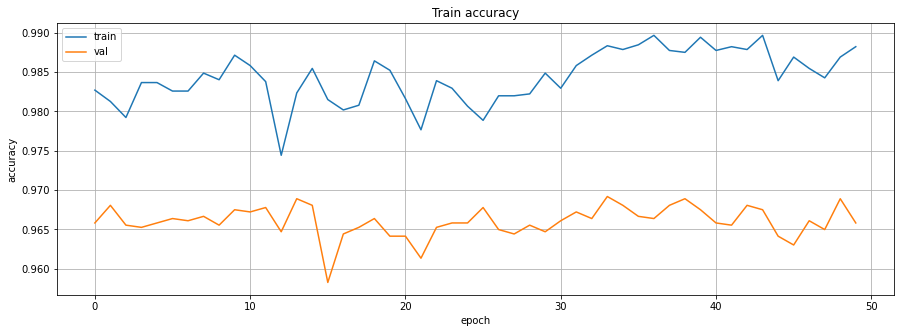

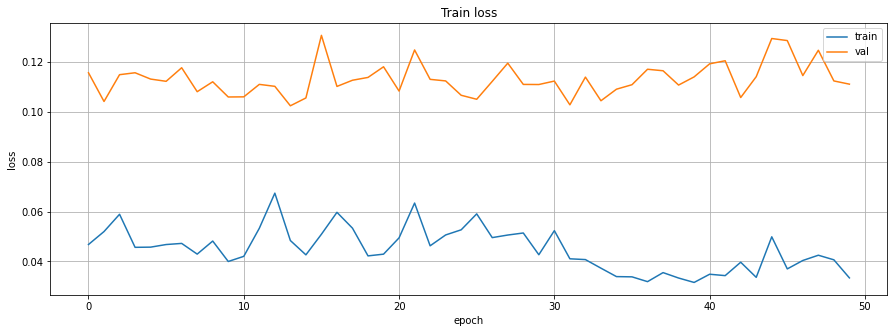

In [26]:
#######################################################################
# Inspect the saved files (sorted by modification date, newest first)
!ls -lt

history.history.keys()
# Summarize history for accuracy
plt.figure(figsize=(15,5))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.grid()
plt.show()

# Summarize history for loss
plt.figure(figsize=(15,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.grid()
plt.show()

#Compare all ML and DL Models

In [27]:
#Compare ML result after tune


print(FinalResultList[['model','Acc','train time', 'inference time']].groupby('model').agg(['mean','std']))

fig = px.scatter(FinalResultList, x="train time", y="Acc", color="type",size="Acc", hover_data=['model' , 'repetition'],title='Accuracy vs Runtime for ML models',symbol = 'model')
fig.show()


fig = px.box(FinalResultList, x="model", y="Acc", points="all",title="Acc score for ML model",color="type")
fig.show()

fig = px.box(FinalResultList, x="model", y="train time", points="all",title="Train time for ML model",color="type")
fig.show()

fig = px.box(FinalResultList, x="model", y="inference time", points="all",title="Inference time for ML model",color="type")
fig.show()

                           Acc           train time           inference time  \
                          mean       std       mean       std           mean   
model                                                                          
Deeplearning          0.968431  0.004204  19.671176  1.643416       0.174233   
ExtraTreesClassifier  0.988039  0.001390   0.402188  0.008039       0.038374   

                                
                           std  
model                           
Deeplearning          0.005801  
ExtraTreesClassifier  0.000729  
